In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Task 0
Read the dataset from csv file & perform data cleaning - remove all rows, which contains `?` in some columns.
Also check for data correctness (salary & salary $K).

In [2]:
df = pd.read_csv("../data/adult.csv")
df.replace("?", np.nan, inplace=True)
df = df.dropna()

invalid_salary_values = ["<=50K", ">50K"]
invalid_salary_k_values = ["<=50K", ">50K"]

invalid_values = df[
    (
        (df["salary"].isin(invalid_salary_values))
        & (df["salary K$"].isin(invalid_salary_k_values))
    )
]

if invalid_values.empty:
    print("Data is correctly formatted")
else:
    print(invalid_values)

Data is correctly formatted


# Task 1
Print the count of men and women in the dataset.

In [3]:
df.sex.value_counts()

sex
Male      20380
Female     9782
Name: count, dtype: int64

# Task 2
Find the average age of men in dataset

In [4]:
df[df["sex"] == "Male"]["age"].mean()

39.18400392541707

# Task 3
Get the percentage of people from Poland (native-country)

In [5]:
(df["native-country"] == "Poland").sum() / len(df) * 100

0.18566408063125786

# Task 4
Get the mean and standard deviation of the age for people who earn > 50K per year. After this, get it for those who earn <= 50K.

In [6]:
print("Mean of the age for salary:")
print("> 50K/year:", df[df["salary"] == ">50K"]["age"].mean().round(2))
print("< 50K/year:", df[df["salary"] == "<=50K"]["age"].mean().round(2))

print("Standard deviation of the age for salary:")
print("> 50K/year:", df[df["salary"] == ">50K"]["age"].std().round(2))
print("< 50K/year:", df[df["salary"] == "<=50K"]["age"].std().round(2))

Mean of the age for salary:
> 50K/year: 43.96
< 50K/year: 36.61
Standard deviation of the age for salary:
> 50K/year: 10.27
< 50K/year: 13.46


# Task 5
Check, if there are some people without higher education (education: Bachelors, Prof-school, Assoc-acdm, Assoc-voc, Masters, Doctorate), but with > 50K salary

In [7]:
df[
    (
        df["education"].isin(
            [
                "Bachelors",
                "Prof-school",
                "Assoc-acdm",
                "Assoc-voc",
                "Masters",
                "Doctorate",
            ]
        )
    )
    & (df["salary"] == ">50K")
]

,Unnamed: 0,age,workclass,education,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,salary,salary K$
8,8,31,Private,Masters,Never-married,Prof-specialty,Not-in-family,White,Female,50,United-States,>50K,330
9,9,42,Private,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,40,United-States,>50K,303
11,11,30,State-gov,Bachelors,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,40,India,>50K,279
19,19,43,Self-emp-not-inc,Masters,Divorced,Exec-managerial,Unmarried,White,Female,45,United-States,>50K,151
20,20,40,Private,Doctorate,Married-civ-spouse,Prof-specialty,Husband,White,Male,60,United-States,>50K,265
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32533,32533,54,Private,Bachelors,Married-civ-spouse,Exec-managerial,Husband,Asian-Pac-Islander,Male,50,Japan,>50K,347
32536,32536,34,Private,Bachelors,Never-married,Exec-managerial,Not-in-family,White,Female,55,United-States,>50K,260
32538,32538,38,Private,Bachelors,Divorced,Prof-specialty,Unmarried,Black,Female,45,United-States,>50K,248
32545,32545,39,Local-gov,Assoc-acdm,Married-civ-spouse,Adm-clerical,Wife,White,Female,20,United-States,>50K,122


# Task 6
Get the statistics of age for each type of education. Use `groupby` and `describe` for this.

In [8]:
df.groupby("education")["age"].describe()

,count,mean,std,min,25%,50%,75%,max
education,,,,,,,,
10th,820.0,37.897561,16.225795,17.0,23.0,36.0,52.0,90.0
11th,1048.0,32.363550,15.089307,17.0,18.0,28.5,43.0,90.0
12th,377.0,32.013263,14.373710,17.0,19.0,28.0,41.0,79.0
1st-4th,151.0,44.622517,14.929051,19.0,33.0,44.0,56.0,81.0
5th-6th,288.0,41.649306,14.754622,17.0,28.0,41.0,53.0,82.0
7th-8th,557.0,47.631957,15.737479,17.0,34.0,49.0,60.0,90.0
9th,455.0,40.303297,15.335754,17.0,28.0,38.0,53.0,90.0
Assoc-acdm,1008.0,37.286706,10.509755,19.0,29.0,36.0,44.0,90.0
Assoc-voc,1307.0,38.246366,11.181253,19.0,30.0,37.0,45.0,84.0


# Task 7
Compare the married and non-married men salaries. Who earns more? (>50K or <=50K)
Married men are those, whom `marital-status` starts with "Married". Others are not.

In [9]:
df["marital-status"] = df["marital-status"].str.startswith("Married")
men_data = df[df["sex"] == "Male"]
salary_comparison = (
    men_data.groupby(["marital-status", "salary"]).size().unstack()
)
print(salary_comparison)

salary          <=50K  >50K
marital-status             
False            6932   673
True             7052  5723


# Task 8
Get the max hours per week some person works. How many people works the same amount of hours per week?

In [10]:
df[df["hours-per-week"] == df["hours-per-week"].max()].shape[0]

78

# Task 9
Analyze the correlation between data in dataset. Understand connected fields in it and print highlight their connection.

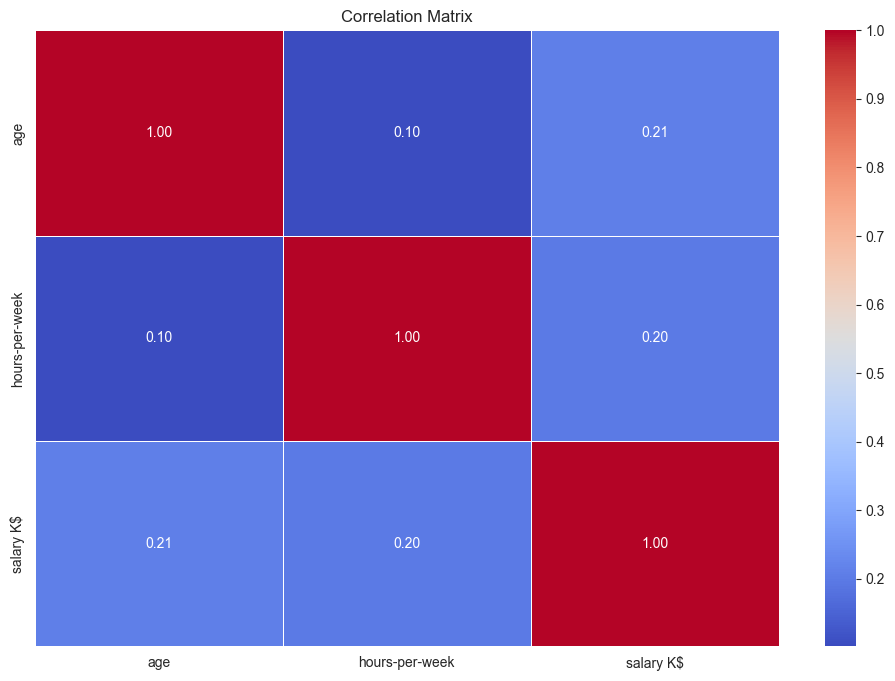

In [11]:
numeric_df = df[["age", "hours-per-week", "salary K$"]]

correlation_matrix = numeric_df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(
    correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5
)
plt.title("Correlation Matrix")
plt.show()